# Import libraries

In [72]:
#----------------------------
# import libraries
#----------------------------
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.io as sio
from matplotlib import pyplot as plt
#----------------------------
# scikit-learn
#----------------------------
# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
# neural network
from sklearn.neural_network import MLPClassifier
# metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
#----------------------------
#use fixed point notation
np.set_printoptions(suppress=True)

# Reading the dataset (.mat file)

In [73]:
from os.path import abspath, join
# get the root dir ('current_dir/..')
root_dir = abspath('..')
dataset_dir = join(root_dir, 'dataset')

In [74]:
# set dataset files path
training_file = join(dataset_dir, 'dados_treinamento.mat')
validation_file = join(dataset_dir, 'dados_val.mat')
test_file = join(dataset_dir, 'dados_teste.mat')

In [75]:
# read mat files
training = sio.loadmat(training_file)
validation = sio.loadmat(validation_file)
test = sio.loadmat(test_file)

## Training, validation and test sets

In [76]:
# training set
X_raw = training['X']
y_raw = training['y']
y = y_raw.flatten()
#----------------------------
# validation set
Xval_raw = validation['Xval']
yval_raw = validation['yval']
yval = yval_raw.flatten()
#----------------------------
# test set
Xt_raw = test['Xt']
yt_raw = test['yt']
yt = yt_raw.flatten()

# Preprocessing the data

In [77]:
# data standardization: x' = (x - u) / s
scaler = StandardScaler()
# fit only on training + validation set
scaler.fit(X_raw + Xval_raw)
# perform standardization with x data
X = scaler.transform(X_raw)
Xval = scaler.transform(Xval_raw)
# apply same transformation to test data
Xt = scaler.transform(Xt_raw)

# Data Visualization

## Plotting the result of classification

In [25]:
def plot_data(X, y, alpha=1):
    # prepare date
    x1 = X[:,0]
    x2 = X[:,1]
    y = y.flatten()
    # create dataframe
    df = pd.DataFrame(data={'x1': x1, 'x2': x2, 'label': y})
    # dataframe of positive and negative class
    PC = df.loc[df['label'] == 1]
    NC = df.loc[df['label'] == -1]
    # plot points
    #plt.cla() # clear axis
    #plt.clf() # clear figure
    #ax = PC.plot(kind='scatter', x='x1', y='x2', color='blue', marker='.')
    #NC.plot(ax=ax, grid=True, kind='scatter', x='x1', y='x2', color='red', marker='.')
    ax1 = PC.plot(kind='scatter', x='x1', y='x2', alpha=alpha, color='blue', marker='.')
    ax2 = NC.plot(ax=ax1, grid=True, kind='scatter', x='x1', y='x2', alpha=alpha, color='red', marker='.')
    return ax2

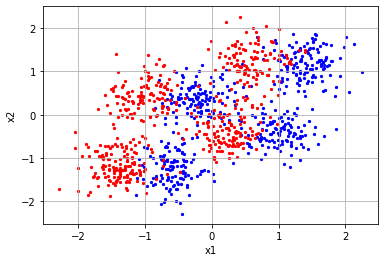

In [28]:
plot_data(X_raw, y)

## Plotting the decision regions

In [45]:
def plot_decision_regions(X, model):
    # split X in x1 and x2
    x1 = X[:, 0]
    x2 = X[:, 1]
    # define grid limits for x1 and x2
    x1_min = x1.min() - 0.25
    x1_max = x1.max() + 0.25
    x2_min = x2.min() - 0.25
    x2_max = x2.max() + 0.25
    #----------------------------
    # create grid
    #steps = 4096
    steps = 1000
    x1_span = np.linspace(x1_min, x1_max, steps)
    x2_span = np.linspace(x2_min, x2_max, steps)
    xx1, xx2 = np.meshgrid(x1_span, x2_span)
    # convert to 1-D array and concatenate them
    xx1_f = xx1.flatten()
    xx2_f = xx2.flatten()
    points = np.c_[xx1_f, xx2_f]
    #----------------------------
    # plot decision regions
    y = clf.predict(points)
    y = y.reshape(xx1.shape)
    ax = plt.contourf(xx1, xx2, y, cmap=plt.cm.Spectral)
    return ax

# Multi-layer Perceptron Classifier

In [ ]:
units=100
clf = MLPClassifier(
    hidden_layer_sizes=(units,),
    activation='relu',
    solver='sgd',
    #alpha=0.0001,
    batch_size=1000,
    learning_rate='constant',
    learning_rate_init=0.00001,
    max_iter=1000,
    #random_state=42,
    tol=1e-3,
    #verbose=True
)
clf.fit(X, y)
clf.loss_

In [ ]:
error = []
for i in range(1,11):
    units = i
    clf.fit(X, y)
    error.append(clf.loss_)

/usr/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [12]:
error

[0.7303064022544685,
 0.6962428714614596,
 0.6891746680324067,
 0.6950506308184414,
 0.6852590081731568,
 0.6716453228874817,
 0.6850707830384856,
 0.6722300254555,
 0.6930843213844353,
 0.6834985591534387]

In [13]:
clf.fit(X, y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size=1000, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1000,), learning_rate='constant',
              learning_rate_init=1e-05, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=1e-06,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [14]:
clf.loss_

0.6969207248181982

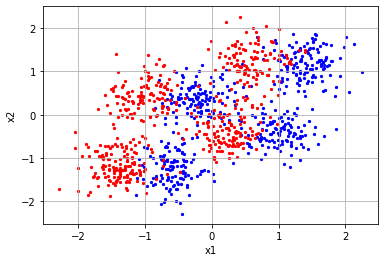

In [27]:
plot_data(X_raw, y)

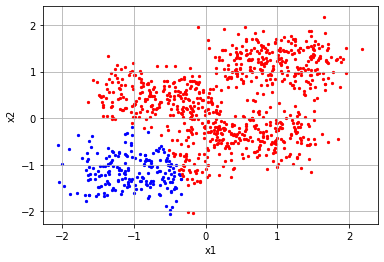

In [129]:
plot_data(Xval_raw, yval_pred)

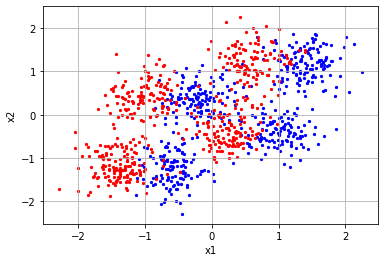

In [128]:
yval_pred = clf.predict(Xval)
yval_pred = yval_pred.reshape(1000,-1)
plot_data(X_raw, y_raw)

In [ ]:
plot_decision_regions(X, clf)

In [ ]:
clf.score(Xt, yt)